<a href="https://colab.research.google.com/github/Rithvikns/Machine_Learning/blob/main/Supervised_Learning/Both_classification_Regression/Random_Forest/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0    

<ipython-input-1-940c34c75987>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


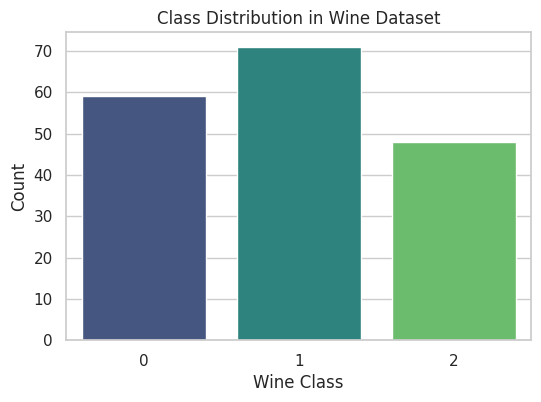

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Accuracy Score: 1.0


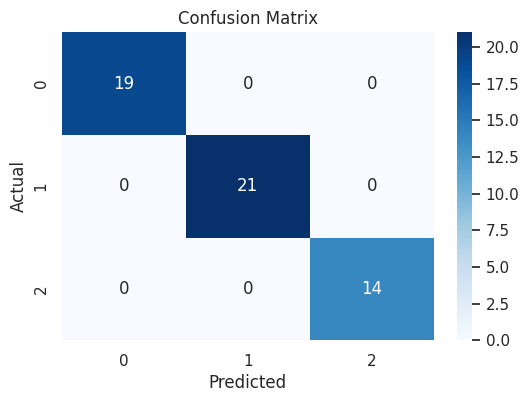

<ipython-input-1-940c34c75987>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='rocket')


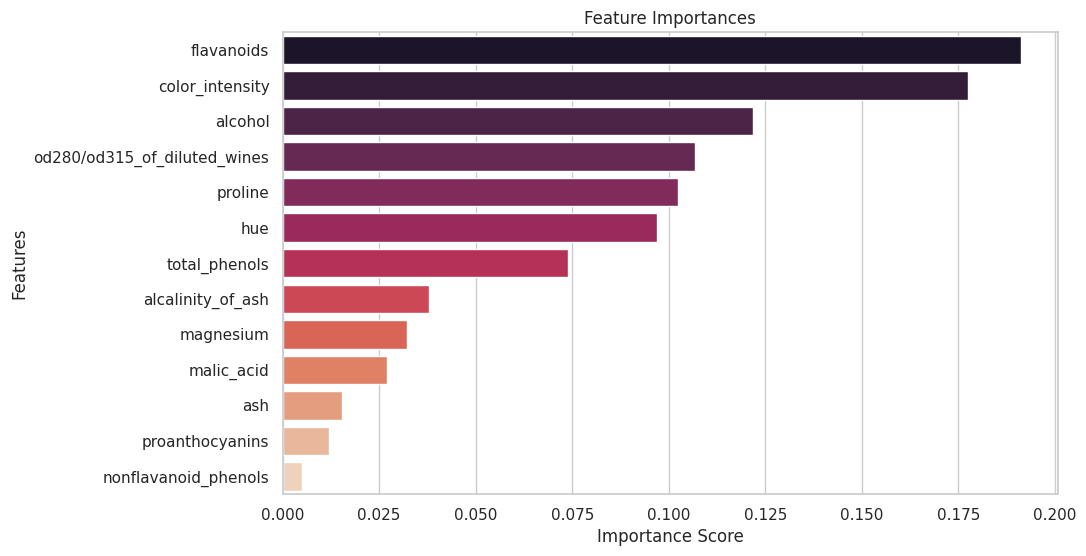


--- Random Forest Regressor Example ---
Mean Squared Error: 919.2106649798413


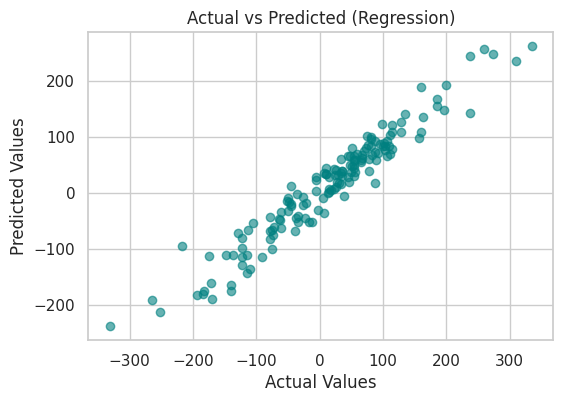

In [1]:
# Install dependencies (if not already installed)
!pip install scikit-learn matplotlib seaborn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

# Set plot style
sns.set(style='whitegrid', palette='muted')

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

print("Dataset Head:")
print(X.head())

# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='viridis')
plt.title("Class Distribution in Wine Dataset")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.show()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predictions
y_pred = best_clf.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette='rocket')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Bonus: Random Forest Regressor
print("\n--- Random Forest Regressor Example ---")
# Create a synthetic regression dataset
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split the data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_reg_train, y_reg_train)

# Predictions
y_reg_pred = reg.predict(X_reg_test)

# Evaluation
mse = mean_squared_error(y_reg_test, y_reg_pred)
print("Mean Squared Error:", mse)

# Plot predictions
plt.figure(figsize=(6,4))
plt.scatter(y_reg_test, y_reg_pred, color='teal', alpha=0.6)
plt.title("Actual vs Predicted (Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
